<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f">Same issue with project 1, certain lines of code cannot be run as you did not upload the necessary data files onto your repository! Features Engineering is missing from this project, if you need additional help with the concept of features engineering, please dont hesitate to approach us. A suggestion would be to look at how other people do it and try to redo this project.<br><br>
        You are supposed to come up with a model to predict which features (Basement? Fireplace? Lot Size?) of a house affects the sales price of homes in Iowa. You can first eliminate the correlated features, or remove the features that have too many empty values. THEN you can run the different regression models to see which model produces the best score.<br><br>
        • Problem Statement: <b>Meet Minimum Requirement</b> <br>
        • Data Cleaning and EDA: <b>Meet Minimum Requirement</b><br>
        • Preprocessing and Modelling: <b>Meet Minimum Requirement</b><br>
        • Evaluation and Conceptual Understanding: <b>Meet Minimum Requirement</b><br>
        • Conclusion and Recommendation: <b>Meet Minimum Requirement</b><br>
        • Project Organisation: <b>Meet Minimum Requirement</b><br>
        • Visualisations: <b>Meet Minimum Requirement</b><br>
        • Python Syntax and Control Flow: <b>Meet Mininum Requirement</b><br>
    </font>
</div>

# Ames House Price Prediction

In this project, I predicted the house prices of Ames Housing.

The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [124]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline

In [125]:
df_train=pd.read_csv('./datasets/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [126]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [127]:
df_test=pd.read_csv('./datasets/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [128]:
# Saving the Id columns
train_id=df_train['Id']
test_id=df_test['Id']

# Dropping Id columns from both train and test as these are not needed for prediction
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Data Visualization and Processing

## 1) Visualizing and Removing Outliers

In [129]:
# correlation
#sns.pairplot(df_test.corr())

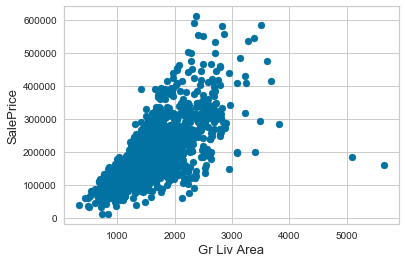

In [130]:
# Exploring outliers

fig, ax = plt.subplots()
ax.scatter(x = df_train['Gr Liv Area'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

There are extreme outliers for GrLivArea>4000 as per http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt

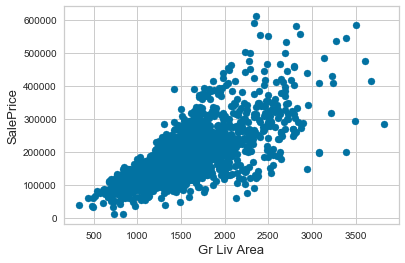

In [131]:
# Removing outliers

df_train = df_train.drop(df_train[(df_train['Gr Liv Area']>4000)].index)

#Check the scatter plot again
fig, ax = plt.subplots()
ax.scatter(df_train['Gr Liv Area'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

 https://www.scikit-yb.org/en/latest/api/regressor/influence.html <br>
### Cook’s Distance <b>
Cook’s Distance is a measure of an observation or instances’ influence on a linear regression. Instances with a large influence may be outliers and datasets that have a large number of highly influential points might not be good predictors to fit linear models. The CooksDistance visualizer shows a stem plot of all instances by index and their associated distance score, along with a heuristic threshold to quickly show what percent of the dataset may be impacting OLS regression models.

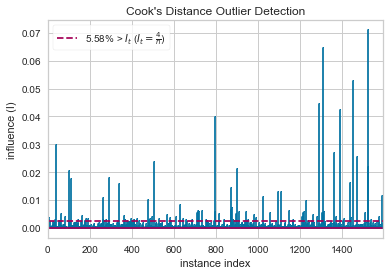

In [132]:
from yellowbrick.regressor import CooksDistance

num = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
df_cook = df_train[num].dropna()
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(df_cook.drop('SalePrice',axis=1), df_cook.SalePrice)
visualizer.show()

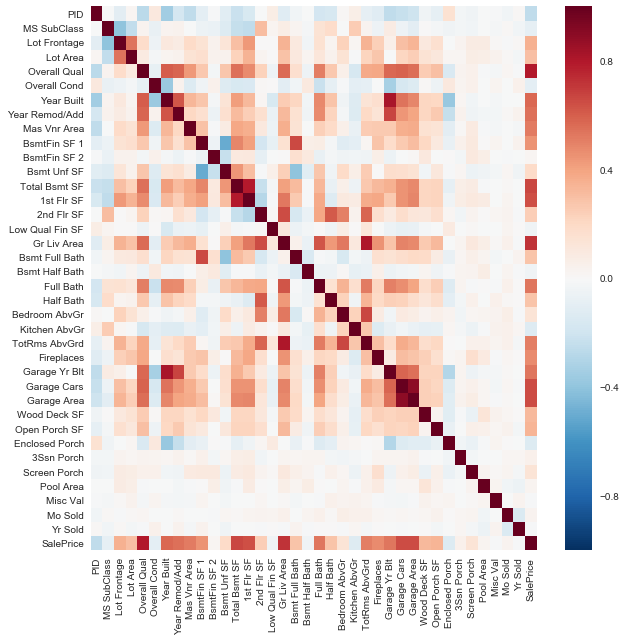

In [133]:
numeric_data = df_train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,10))
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [134]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values

SalePrice         1.000000
Overall Qual      0.803462
Gr Liv Area       0.719463
Total Bsmt SF     0.664819
Garage Area       0.655483
Garage Cars       0.648667
1st Flr SF        0.648252
Year Built        0.572405
Year Remod/Add    0.550872
Full Bath         0.538225
Garage Yr Blt     0.534514
Mas Vnr Area      0.520023
TotRms AbvGrd     0.509775
Fireplaces        0.473783
BsmtFin SF 1      0.445764
Name: SalePrice, dtype: float64 

----------------------
MS SubClass      -0.087331
Overall Cond     -0.097093
Kitchen AbvGr    -0.125472
Enclosed Porch   -0.135713
PID              -0.255068
Name: SalePrice, dtype: float64


## 2) Predicting Nature of Target Variable

Text(0.5, 1.0, 'SalePrice distribution')

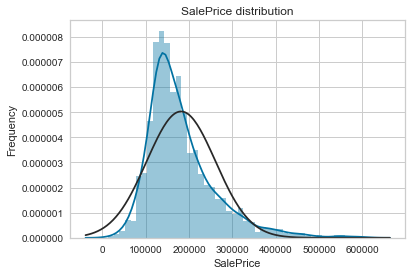

In [135]:
# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(df_train['SalePrice'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

### We can make 2 observations from the above plot:-

1) SalePrice data is right-skewed and unimodal.

2) Most of the houses have SalePrice around 150000.

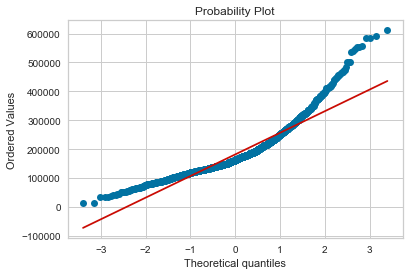

In [136]:
# Probability plot or QQ plot to see the linear fit of the SalePrice

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The SalePrice is not linearly fitted as it is not normally distributed. We need to make log transformation on the target variable to make it more fit to the linear model.

In [137]:
# Log Transformation of the Target Variable
df_train["SalePrice"]=np.log1p(df_train["SalePrice"]) # log(1+x)


 mu = 12.02 and sigma = 0.41



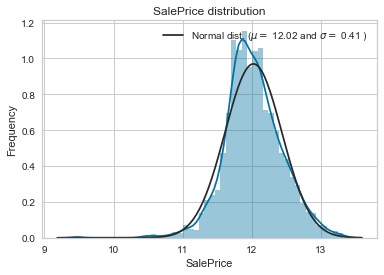

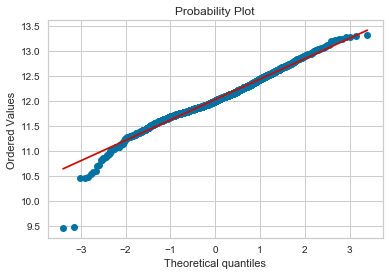

In [138]:
# Plots after transformation

# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Probability plot or QQ plot to see the linear fit of the SalePrice
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## 3) Handling Missing Data

In [139]:
# Combining test data and train data
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data = pd.get_dummies(all_data,drop_first=True)
all_data.shape

(2928, 255)

In [140]:
all_data.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Enclosed Porch,...,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Street_Pave,Utilities_NoSeWa,Utilities_NoSewr
0,725,754,0,3,0.0,0.0,192.0,533.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
1,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
2,1057,0,0,3,1.0,0.0,326.0,731.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
3,744,700,0,3,0.0,0.0,384.0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
4,831,614,0,3,0.0,0.0,676.0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0


In [141]:
# Imputing missing data by the mean of each column.
all_data = all_data.fillna(df_test.mean())

In [142]:
all_data.to_csv('all_data.csv')

# Features Selection

# Modelling the data

In [143]:
# Generating train and test sets


X_train=all_data.iloc[:df_train.shape[0],]
X_test=all_data.iloc[df_train.shape[0]:,]
y_train=df_train.SalePrice


In [144]:
# Importing libraries for modelling

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [145]:
# Cross Validation Strategy to pick the best model
# np.sqrt(((predictions - targets) ** 2).mean())

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# r-squared score

def rsquared_cv(model):
    rsq= cross_val_score(model, X_train, y_train, cv = 5)
    return(rsq)

In [146]:
# Linear regression
model_LinearReg = LinearRegression()
model_LinearReg.fit(X_train, y_train)
rmse_LinearReg = rmse_cv(model_LinearReg).mean()
print(rmse_LinearReg)
print(rsquared_cv(model_LinearReg).mean())


0.1677857778407116
0.8204975329422008


In [147]:
# RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
ridge_params = {'alpha':[200, 250,270,300]}
model_RidgeCV = GridSearchCV(linear_model.Ridge(), param_grid=ridge_params,scoring="neg_mean_squared_error", cv=10)
#model_RidgeCV = RidgeCV()
model_RidgeCV.fit(X_train, y_train)
rmse_RidgeCV = rmse_cv(model_RidgeCV).mean()
rmse_RidgeCV
print(rsquared_cv(model_RidgeCV).mean())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6156e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61534e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60418e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59071e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61052e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

-0.016292947346982063


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87073e-18): result may not be accurate.
  overwrite_a=True).T


In [148]:
# ElasticNet
l1_space = np.linspace(0, 1, 30)
elastic_params = {'l1_ratio': l1_space}

#model_ElasticNet=ElasticNet()
model_ElasticNet=GridSearchCV(linear_model.ElasticNet(), param_grid=elastic_params,scoring="neg_mean_squared_error", cv=10)
model_ElasticNet.fit(X_train,y_train)
rmse_ElasticNet=rmse_cv(model_ElasticNet).mean()
rmse_ElasticNet

0.1405570863239693

In [149]:
# lassoCV
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
# model_lassoCV=LassoCV()
model_lassoCV=GridSearchCV(linear_model.Lasso(), param_grid=lasso_params,scoring="neg_mean_squared_error", cv=10)
model_lassoCV.fit(X_train,y_train)
rmse_lassoCV=rmse_cv(model_lassoCV).mean()
rmse_lassoCV

0.13903468207884112

###  Comparing RMSE of each Model

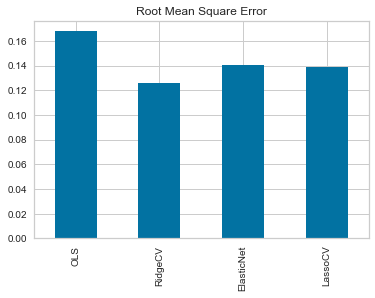

In [150]:
# Creating RMSE Dictionary
rmse_dict = {'data':[rmse_LinearReg,rmse_RidgeCV, rmse_ElasticNet, rmse_lassoCV]}

# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['OLS', 'RidgeCV','ElasticNet','LassoCV'])

# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

### Predicting Test Data

#### Based on above results, Ridge Regression is chosen

In [151]:
print("RidgeCV best tuned parameters : {}".format(model_RidgeCV.best_params_))

RidgeCV best tuned parameters : {'alpha': 200}


In [152]:
y_test = model_RidgeCV.predict(X_test)

In [153]:
hprice = pd.DataFrame({"id":test_id})
hprice = hprice.assign(SalePrice = y_test)
hprice.head()

,id,SalePrice
0,2658,11.788006
1,2718,12.001480
2,2414,12.260049
3,1989,11.564768
4,625,12.047863


In [154]:
# Feeding Id and SalePrice into Test data
df_test['SalePrice']=y_test
df_test['Id']=test_id

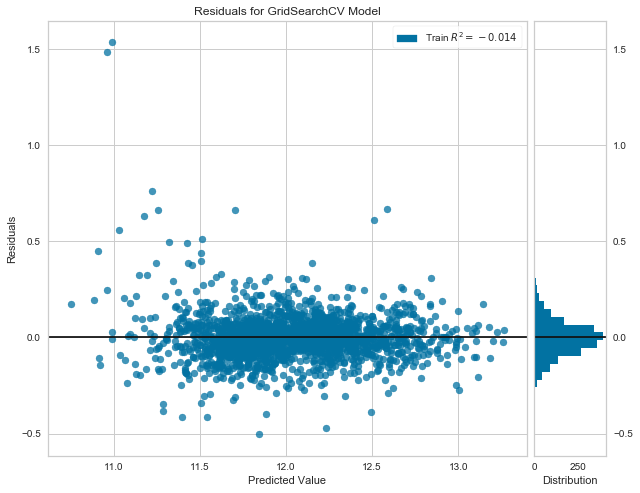

In [155]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(10,8))
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model_RidgeCV)


visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

"Multiple linear regression has assumptions just like all other parametric approaches. It is often time not possible to test the assumptions before running the model. Therefor, model diagnostics should be ran after fitting the model to test the following assumptions:<br>

Data must not have multicollinearity<br>
The residual errors should be approximately normally distributed<br>
Homoscedasticity<br>
Independence of errors"<br>

(taken from https://pythonfordatascience.org/linear-regression-python/ ) <br>

As such,we review the residual plots against the predicted value. <br>

To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible. <br> 
The residuals appear to be randomly distributed across the predicted values.<br>

There are a few large residual outliers in the trainset which suggest that the outlier should be further eliminated.  <br>

# Data Visualization for Validation of the Predicted Test Data

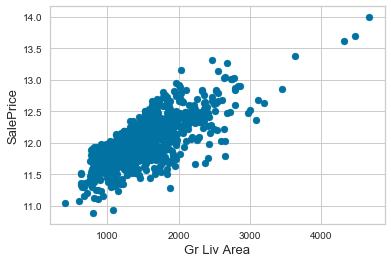

In [156]:
# Visualizing SalePrice with respect to GrLivArea

fig, ax = plt.subplots()
ax.scatter(x = df_test['Gr Liv Area'], y = df_test['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()


 mu = 12.02 and sigma = 0.41



Text(0.5, 1.0, 'SalePrice distribution')

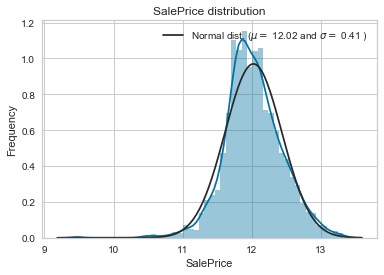

In [157]:
# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.39



Text(0.5, 1.0, 'SalePrice distribution')

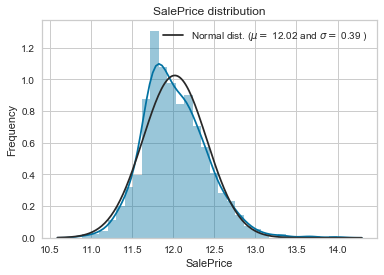

In [158]:
# Histogram plot of SalePrice
sns.distplot(df_test['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_test['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

The histogram plots of both the Train data and the Test data are in sync. Hence, there is high accuracy in the predicted data.

# Exporting the results to external CSV file

In [159]:
df_test[['Id', 'SalePrice']].to_csv('./datasets/Predicted_House_Price.csv', index=False)